I'm constantly looking for new ways to visualize data. In this exercise, I'll be comparing different galaxy morphologies (categorical data) against some other parameters in the ECO data set.

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import pandas as pd

root_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))

%matplotlib inline

In [2]:
eco_columns = ['RAdeg', 'DEdeg', 'cz', 'rMag', 'logM', 'u-r', 'u-J', 'R50', 'R90', 'M', 'FM', 
               'Grp', 'Grpcz', 'FC', 'logMh', 'Den', 'FA', 'FHI', 'FG', 'CCr', 'CCb']

df = pd.read_csv(os.path.join(root_dir, 'data', 'eco_dr1.txt'),
                 delim_whitespace=True, skiprows=56, index_col=0,
                 names=eco_columns)

df.head()

,RAdeg,DEdeg,cz,rMag,logM,u-r,u-J,R50,R90,M,...,Grp,Grpcz,FC,logMh,Den,FA,FHI,FG,CCr,CCb
ECO12079,130.065,23.375,7230.9,-18.80,8.91,0.88,2.06,3.5,8.9,L,...,8480,7230.9,1,11.02,0.19,0,1,0,1.14,1.0
ECO02120,130.095,23.539,3534.8,-20.82,10.23,1.31,3.31,16.2,34.2,L,...,1918,3534.8,1,11.63,0.24,0,1,0,1.07,1.0
ECO08137,130.106,18.316,4373.9,-17.87,8.95,1.84,3.42,4.1,13.6,E,...,5958,4373.9,1,10.84,0.67,0,1,0,1.15,1.0
ECO00569,130.113,18.574,4491.7,-18.03,8.81,0.76,1.97,12.0,30.7,L,...,552,4491.7,1,10.87,0.74,0,1,0,1.15,1.0
ECO10139,130.126,27.631,6151.0,-18.99,9.23,1.18,2.30,13.4,27.7,L,...,7240,6151.0,1,11.06,0.57,1,2,0,1.10,1.0


Let's compare morphology, u-J color, and density.

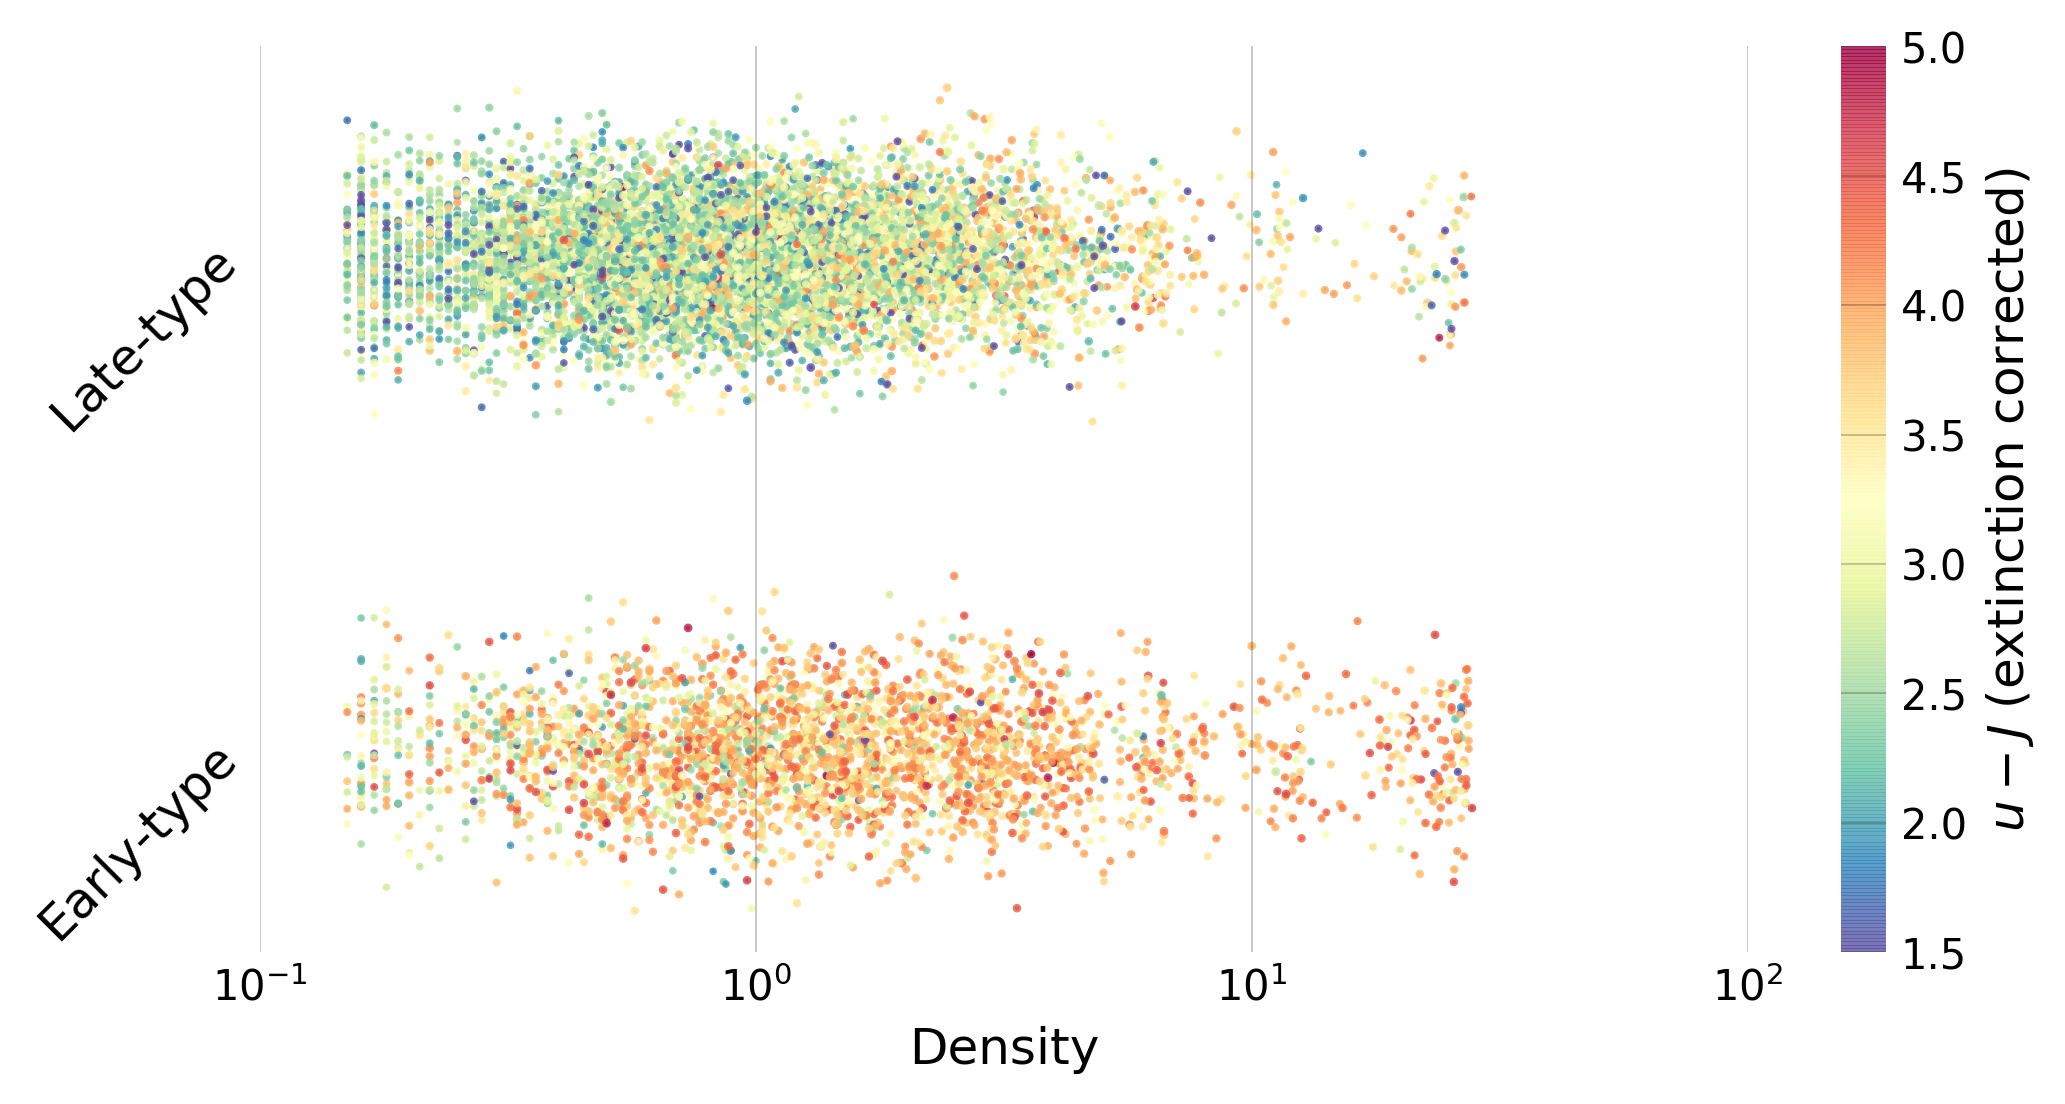

In [118]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4), dpi=300)



morphologies = df[(df.M != '-') & (10 > df['u-J']) & (df['u-J'] > -10)].groupby('M')[['u-J', 'Den']]

vmin, vmax = 1.5, 5

for i, [name, group] in enumerate(morphologies):
    morphology = group[['u-J', 'Den', 'logM']]
    
    y = i + np.random.randn(len(morphology)) * 1e-1
    x = morphology['Den']
    s = np.power(morphology['logM'], 2) * 0.01
    c = morphology['u-J'].as_matrix()
    
    im = ax.scatter(x, y, c=c, s=s, cmap=matplotlib.cm.Spectral_r, vmin=vmin, vmax=vmax, alpha=0.8)
    
ax.set_yticks([0, 1])
ax.set_yticklabels(['Early-type', 'Late-type'], rotation=45, fontsize=12)

# remove borders
[spine.set_visible(False) for spine in ax.spines.itervalues()]

ax.set_xlim(0.1, 100)
ax.set_xlabel('Density', fontsize=12)
ax.grid(axis='x', which='major', c='black', lw=0.1)
ax.tick_params(which='both', axis='both', length=0)
ax.set_xscale('log')

cb = fig.colorbar(im, )
cb.outline.set_visible(False)
cb_ax = cb.ax
cb_ax.grid(axis='y', which='major', c='black', lw=0.1)
cb_ax.tick_params(which='both', axis='both', length=0)
cb.set_label('$u-J$ (extinction corrected)', fontsize=12)